In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# loading the csv data to a pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')


In [ ]:
#print first five rows in the df
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
  #print last 5 rows of the dataframe
  gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows of columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic info about the data
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the stastistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
# find the correlation -ve or +ve
correlation=gold_data.corr()

<ipython-input-10-fd8503894554>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

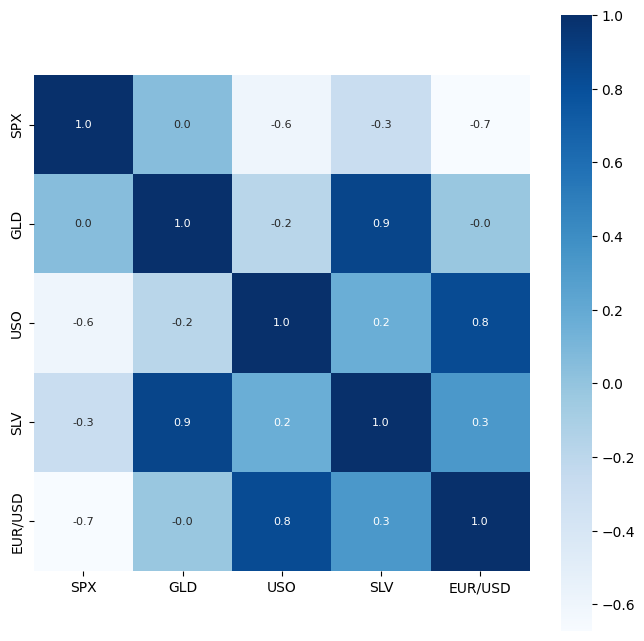

In [ ]:
# constructing a heapmap to understand the coorelation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-21-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

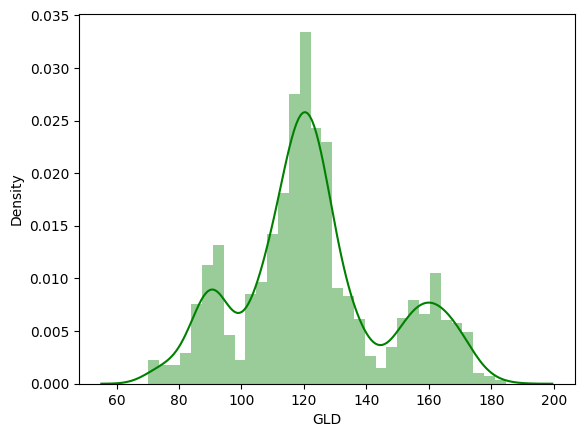

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
# splitting this data-> Splitting the Features and targets
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# Splitting into training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
# Model training -> Random Forest Regressor -> Joint Models
regressor=RandomForestRegressor(n_estimators=100)


In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# Model Evaluation-> prediction on the test data
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.79579943  81.98179999 115.68990014 127.6322006  120.79490155
 154.83389679 149.87009885 126.11510078 117.60169867 126.11800081
 116.61140124 171.9137004  141.59819935 167.7413986  115.34699992
 117.40980035 140.36470232 170.21220132 159.50570307 158.11139869
 155.15070031 125.15220011 176.51319988 157.6581035  125.31340051
  93.8728999   77.81840005 120.55990022 119.10219961 167.51699949
  88.39189999 125.33229999  91.26950071 117.56010012 121.19859922
 136.61670052 115.59500135 114.91420053 146.37969957 107.2948012
 104.24430272  87.11819795 126.57790068 118.19759998 152.57099898
 119.45960042 108.51529999 108.2107985   93.16530061 127.13949794
  74.46680054 113.66299948 121.27310026 111.25799911 118.82219913
 120.90269924 159.92350062 169.57290103 147.19989697  85.88839854
  94.42500022  86.86789909  90.70670002 119.00250059 126.38640057
 127.65769991 170.02909999 122.3349993  117.41389907  98.62870064
 168.70040149 142.90169803 131.21670263 121.23610235 120.98889934
 119.648200

In [ ]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print('R squared error: ', error_score)

R squared error:  0.989491147680031


In [ ]:
# compare the actual values and predicted calues in a plot
# first convet to list
Y_test=list(Y_test)


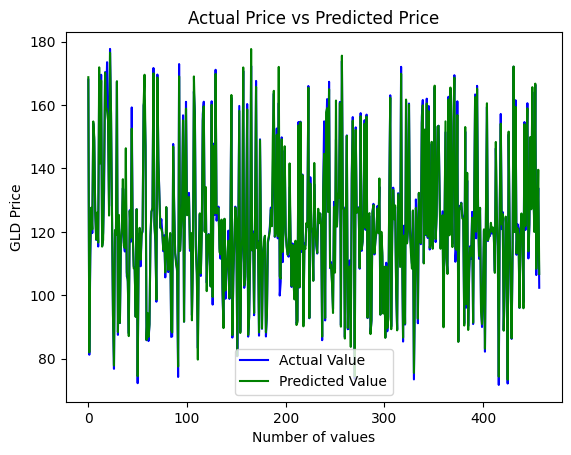

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()